# I-Phone Mobile EDA Project_Using_KNN

# I-Phone Mobile EDA Project_Using_KNN

In [2]:
# Firstly We Have to IMPORT the Libraries -
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
# Importing the Data from our system - 
data = pd.read_csv('D:/Top Mentor/Classes Details/4th May/Files/KNN_Project_5&6/KNN Assignment/iphone_purchase_records.csv')
print(data.head())

   Gender  Age  Salary  Purchase Iphone
0    Male   19   19000                0
1    Male   35   20000                0
2  Female   26   43000                0
3  Female   27   57000                0
4    Male   19   76000                0


In [4]:
## Firstly We have to copy this data as our data keep safe - 
df = data.copy()
print(df.head(2))

  Gender  Age  Salary  Purchase Iphone
0   Male   19   19000                0
1   Male   35   20000                0


In [5]:
## Reading data & Checking basic features of data - 
print('DataSet Information -\n',df.describe())

DataSet Information -
               Age         Salary  Purchase Iphone
count  400.000000     400.000000       400.000000
mean    37.655000   69742.500000         0.357500
std     10.482877   34096.960282         0.479864
min     18.000000   15000.000000         0.000000
25%     29.750000   43000.000000         0.000000
50%     37.000000   70000.000000         0.000000
75%     46.000000   88000.000000         1.000000
max     60.000000  150000.000000         1.000000


In [8]:
#  Checking Data Information 
df.info()
# Checking Null Value -
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


Gender             0
Age                0
Salary             0
Purchase Iphone    0
dtype: int64

In [11]:
##Checking Data Parameter :-
print('no of columns - ' , df.columns)
print('no of shapes - ' , df.shape)
print('no of lenght - ' , len(df))

no of columns -  Index(['Gender', 'Age', 'Salary', 'Purchase Iphone'], dtype='object')
no of shapes -  (400, 4)
no of lenght -  400


In [17]:
## The dataset contains 400 entries and 4 columns:

# Gender: Categorical feature indicating the gender of the individual.
# Age: Numeric feature representing the age of the individual.
# Salary: Numeric feature representing the salary of the individual.
# Purchase Iphone: Target variable, where 0 indicates no purchase, and 1 indicates a purchase.

In [19]:
### Now we are encoding the gender column as Male = 1 & Female = 0

In [21]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [42]:
print(df.columns)

Index(['Gender', 'Age', 'Salary', 'Purchase Iphone'], dtype='object')


In [43]:
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [44]:
df.head()

,Gender,Age,Salary,Purchase Iphone
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [45]:
print(df['Gender'].unique())

[1 0]


In [49]:
## Now we starting the training & Testing for data - y-(  0 No  - 1-Yes)
X = df[['Gender','Age','Salary']]
y =df['Purchase Iphone'] 

In [51]:
X.head()

,Gender,Age,Salary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000


In [52]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchase Iphone, dtype: int64

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train , X_test , y_train ,y_test =train_test_split(X,y,test_size=0.2 ,random_state=42)

In [56]:
X_train.shape , y_train.shape

((320, 3), (320,))

In [57]:
X_test.shape , y_test.shape

((80, 3), (80,))

In [58]:
from sklearn.neighbors import KNeighborsRegressor

In [66]:
model = KNeighborsRegressor(n_neighbors=1)
model

KNeighborsRegressor(n_neighbors=1)

In [67]:
model_train = model.fit(X_train , y_train)
print('The model training is completed')

The model training is completed


In [68]:
from sklearn.metrics import r2_score,mean_absolute_error
pred = model_train.predict(X_test)
pred

array([1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.])

In [69]:
model_train.score(X_train , y_train)

0.9864262990455992

In [70]:
r2_score(y_test,pred)

0.17582417582417598

In [71]:
r2_score(y_test,pred)

0.17582417582417598

In [84]:
error = []
k = []
for i in range (1,40):
    print('When K = ',i)
    model = KNeighborsRegressor(n_neighbors=i)
    model_train = model.fit(X_train ,y_train)
    print('The Model Training in Completed')
    err = round(1- model_train.score ( X_train , y_train),2)
    error.append(err)
    k.append(i)

When K =  1
The Model Training in Completed
When K =  2
The Model Training in Completed
When K =  3
The Model Training in Completed
When K =  4
The Model Training in Completed
When K =  5
The Model Training in Completed
When K =  6
The Model Training in Completed
When K =  7
The Model Training in Completed
When K =  8
The Model Training in Completed
When K =  9
The Model Training in Completed
When K =  10
The Model Training in Completed
When K =  11
The Model Training in Completed
When K =  12
The Model Training in Completed
When K =  13
The Model Training in Completed
When K =  14
The Model Training in Completed
When K =  15
The Model Training in Completed
When K =  16
The Model Training in Completed
When K =  17
The Model Training in Completed
When K =  18
The Model Training in Completed
When K =  19
The Model Training in Completed
When K =  20
The Model Training in Completed
When K =  21
The Model Training in Completed
When K =  22
The Model Training in Completed
When K =  23
The Mo

In [86]:
error

[0.01,
 0.23,
 0.32,
 0.37,
 0.41,
 0.43,
 0.45,
 0.47,
 0.49,
 0.49,
 0.5,
 0.51,
 0.52,
 0.53,
 0.54,
 0.53,
 0.53,
 0.55,
 0.56,
 0.57,
 0.57,
 0.57,
 0.58,
 0.58,
 0.59,
 0.6,
 0.61,
 0.61,
 0.61,
 0.61,
 0.61,
 0.61,
 0.62,
 0.62,
 0.63,
 0.63,
 0.63,
 0.62,
 0.63]

In [79]:
k

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [88]:
## Creating the datafram -
df1 = pd.DataFrame({'K': k , 'Error': error})
df1

,K,Error
0,1,0.01
1,2,0.23
2,3,0.32
3,4,0.37
4,5,0.41
5,6,0.43
6,7,0.45
7,8,0.47
8,9,0.49
9,10,0.49


C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='K', ylabel='Error'>

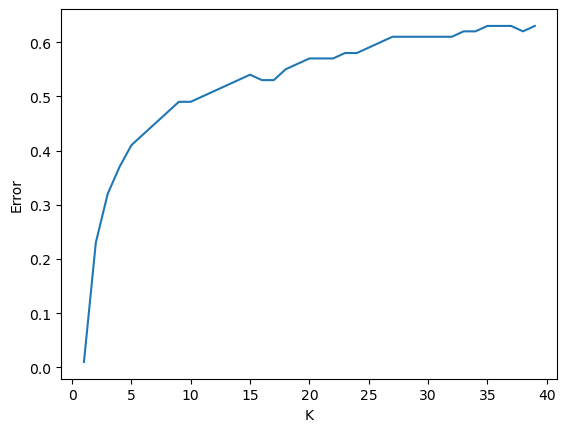

In [89]:
sns.lineplot(x = 'K' , y = 'Error' ,data =df1)

In [90]:
import joblib

In [91]:
joblib.dump(model,'KNN_RegV1.sav')

['KNN_RegV1.sav']